In [1]:
# Imports 
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
# Read the data
df = pd.read_csv('data/student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
list(df)

['Hours', 'Scores']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


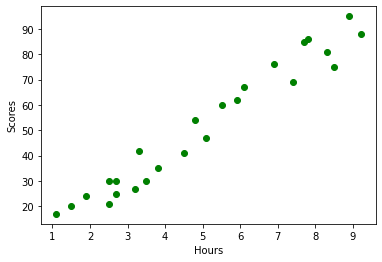

In [7]:
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.scatter(df.Hours, df.Scores, color='green')
plt.show()

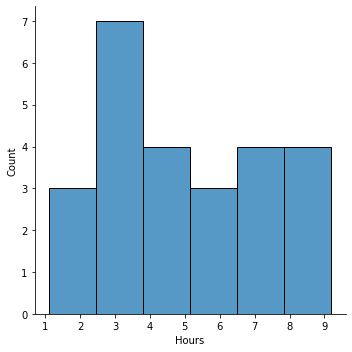

In [8]:
sns.displot(df['Hours'], label='hours') #sns.displot(df['Hours'], label='hours', norm_hist=True)

In [9]:
corr_matrix = df.corr()
corr_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

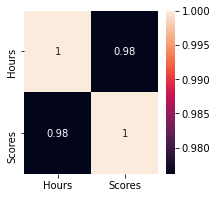

In [10]:
plt.subplots(figsize = (3,3))
sns.heatmap(corr_matrix, annot=True)

# Train the model - method 1

In [11]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

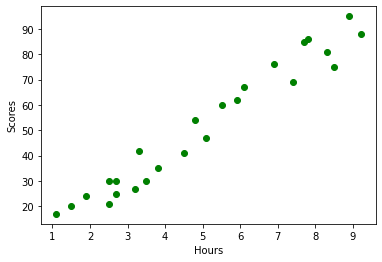

In [12]:
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.scatter(X, y, color="green")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


In [14]:
myreg = LinearRegression()

In [15]:
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [16]:
a = myreg.coef_
b = myreg.intercept_
print(a)
print(b)

[[10.46110829]]
[-1.53695733]


In [17]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

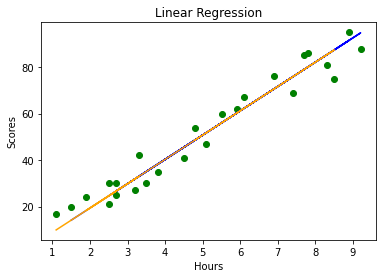

In [18]:
# Predicted values in a plot with original data

plt.title('Linear Regression')
plt.scatter(X,y, color="green")
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [19]:
R2 = myreg.score(X, y)
R2

0.9477059220582453

# Method two

In [20]:
X, y = df.Hours, df.Scores

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [21]:
model = np.polyfit(X_train, y_train, 1)
model

array([10.46110829, -1.53695733])

In [22]:
a, b = model[0], model[1]

In [23]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([ 7.85998595, 11.58885507])

In [24]:
a1, b1 = test[0], test[1]

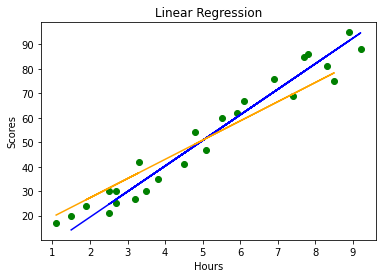

In [25]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [26]:
score_predicted = myreg.predict([[2]])
score_predicted

array([[19.38525926]])

In [27]:
score_predict = a*2 + b
score_predict

19.385259255602275

In [28]:
hours = 10
score_predicted = myreg.predict([[hours]])
score_predicted

array([[103.0741256]])

# Model evaluation
We need evaluation metrics designed for comparing continuous values.

The three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [29]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

7.882398086270432


In [30]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

68.88092074277635


In [31]:

# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

8.299453038771674


Comparing these metrics:

- MAE is the easiest to understand, because it's the average error
- MSE is more popular than MAE, because MSE "punishes" larger errors
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units

### Calculate R-squared

In [32]:
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.86


In [33]:
# R-squared
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

0.8421031525243527

This is bad result!

# Write to file

In [37]:
# Store the model in a file
model_file = './mypolifit.pkl'

# Save now
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

In [38]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    student_model = pickle.load(f)

In [39]:
# Test reading from the file
predict = np.poly1d(student_model)
student_score_prediction = predict(7.5)
print(student_score_prediction)

76.9213548702712
